In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 


# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

import datetime as dt
import pandas as pd

### Test codes

In [5]:
test_date = '2021-06-30'
test = dt.datetime.strptime(test_date,"%Y-%m-%d")
print(test.month)

6


In [6]:
# NOTE: using a datetime method on Measurement.date to extract the month as in the code below generates an error
# june_test_results = session.query(Measurement.date, Measurement.tobs).filter(pd.to_datetime(Measurement.date).strptime("%Y-%m-%d").month == 6 ).all()

In [7]:
temps = []
temps = session.query(Measurement.date).all()
#print(temps)

In [8]:
june_results_test = []
june_results_test = session.query(Measurement.date,Measurement.tobs,Measurement.prcp).filter(extract('month', Measurement.date) == 6 ).all()
june_results_test_df = pd.DataFrame(june_results_test, columns = ['June Dates','June Temps','June Precip.'])
june_results_test_df

,June Dates,June Temps,June Precip.
0,2010-06-01,78.0,0.00
1,2010-06-02,76.0,0.01
2,2010-06-03,78.0,0.00
3,2010-06-04,76.0,0.00
4,2010-06-05,77.0,0.00
...,...,...,...
1695,2017-06-26,79.0,0.02
1696,2017-06-27,74.0,0.10
1697,2017-06-28,74.0,0.02
1698,2017-06-29,76.0,0.04


In [9]:
june_results_test_df.describe()

,June Temps,June Precip.
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [10]:
december_results_test = []
december_results_test = session.query(Measurement.date,Measurement.tobs,Measurement.prcp).filter(extract('month', Measurement.date) == 12 ).all()
december_results_test_df = pd.DataFrame(december_results_test, columns = ['December Dates','December Temps','December Precip.'])
december_results_test_df

,December Dates,December Temps,December Precip.
0,2010-12-01,76.0,0.04
1,2010-12-03,74.0,0.00
2,2010-12-04,74.0,0.00
3,2010-12-06,64.0,0.00
4,2010-12-07,64.0,0.00
...,...,...,...
1512,2016-12-27,71.0,0.14
1513,2016-12-28,71.0,0.14
1514,2016-12-29,69.0,1.03
1515,2016-12-30,65.0,2.37


In [11]:
december_results_test_df.describe()

,December Temps,December Precip.
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


### Final code

In [12]:
## create a variable to store the results

june_results = []
june_results = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6 ).all()
#print(june_results)

In [13]:
#  3. Convert the June temperatures to a list.
june_temp_list = list(np.ravel(june_results))
#print(june_temp_list)

In [14]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp_list, columns = ['June Temps'])
june_temp_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [15]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [16]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = []
december_results = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12 ).all()
#print(december_results)

In [17]:
# 7. Convert the December temperatures to a list.
december_temp_list = list(np.ravel(december_results))
#print(december_temp_list)

In [18]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(december_temp_list, columns = ['December Temps'])
december_temp_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [19]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

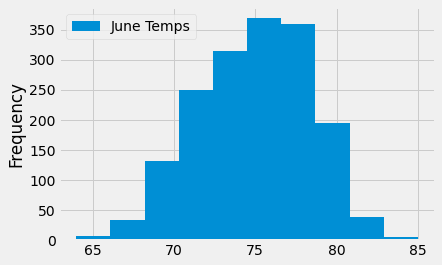

In [21]:
# Plot the June temperature observations
june_temp_df.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

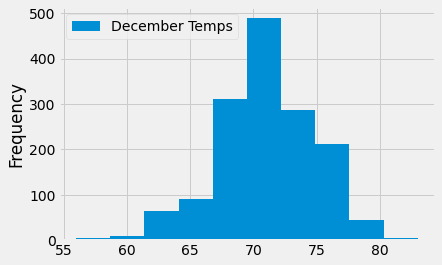

In [22]:
# Plot the December temperature observations
december_temp_df.plot.hist(bins=10)

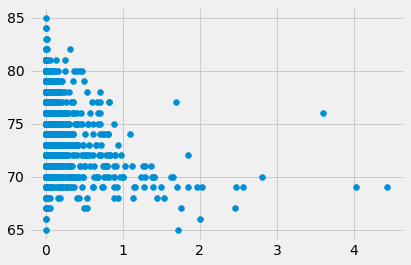

In [23]:
import matplotlib.pyplot as plt

# Plot the June temperature vs. precipitation
plt.scatter(june_results_test_df['June Precip.'],june_results_test_df['June Temps'])

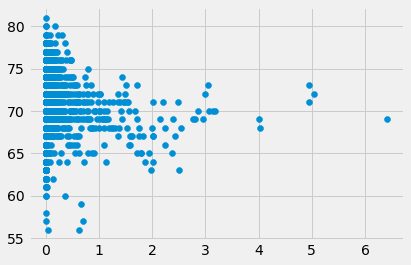

In [24]:
# Plot the December temperature vs. precipitation
plt.scatter(december_results_test_df['December Precip.'],december_results_test_df['December Temps'])